In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/2 BUILDINGNEURALNETWORKS/INTROTONEURALNETWORKS BUILDINGNEURALNETWORKS 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [ ]:
# Working directory -> folder we are working in

In [1]:
from pathlib import Path 


In [4]:
Path(".").resolve()

PosixPath('/Users/elliotstern/Downloads/2025 Course Materials/1_IntroToNeuralNetworks/2-BuildingNeuralNetworks')

In [8]:
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
str(main_dir) + "/data"

'/Users/elliotstern/Downloads/2025 Course Materials/data'

In [33]:
#=================================================-
#### Slide 5: Directory settings  ####

# Set 'main_dir' to location of the project folder
from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)




/Users/elliotstern/Downloads/2025 Course Materials
/Users/elliotstern/Downloads/2025 Course Materials/data


In [34]:
#=================================================-
#### Slide 6: Loading packages  ####

import os
import matplotlib.pyplot as plt
import numpy as np                                    
import pandas as pd
import pickle
from textwrap import wrap
# Scikit-learn package for building a perceptron.
from sklearn.neural_network import MLPClassifier

# Scikit-learn package for data preprocessing.
from sklearn.preprocessing import MinMaxScaler
# Model set up, tuning and model metrics packages.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV




In [35]:
data_dir

'/Users/elliotstern/Downloads/2025 Course Materials/data'

In [36]:
str(data_dir) + '/heart_disease_risk_BRFSS2015.csv'

'/Users/elliotstern/Downloads/2025 Course Materials/data/heart_disease_risk_BRFSS2015.csv'

In [14]:
#=================================================-
#### Slide 7: Load the data  ####

heart_disease = pd.read_csv(str(data_dir) + '/heart_disease_risk_BRFSS2015.csv')
print(heart_disease.head())




   HeartDiseaseorAttack  highbp  highchol  cholcheck  smokingstatus  stroke  \
0                     0       1         1          1              1       0   
1                     0       0         0          0              1       0   
2                     0       1         1          1              0       0   
3                     0       1         0          1              0       0   
4                     0       1         1          1              0       0   

   diabetes  physactivity  fruits  veggies  hvyalcoholconsump  anyhealthcare  \
0         0             0       0        1                  0              1   
1         0             1       0        0                  0              0   
2         0             0       1        0                  0              1   
3         0             1       1        1                  0              1   
4         0             1       1        1                  0              1   

   genhlth  diffwalk Sex_assigned_at_birth  

In [16]:
heart_disease

,HeartDiseaseorAttack,highbp,highchol,cholcheck,smokingstatus,stroke,diabetes,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,genhlth,diffwalk,Sex_assigned_at_birth,age,Education
0,0,1,1,1,1,0,0,0,0,1,0,1,5,1,Female,9,High school graduate
1,0,0,0,0,1,0,0,1,0,0,0,0,3,0,Female,7,College graduate
2,0,1,1,1,0,0,0,0,1,0,0,1,5,1,Female,9,High school graduate
3,0,1,0,1,0,0,0,1,1,1,0,1,2,0,Female,11,Grades 9-11
4,0,1,1,1,0,0,0,1,1,1,0,1,2,0,Female,11,Some college/technical school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203060,0,1,1,1,1,0,2,0,0,0,0,1,5,1,Male,10,Grades 9-11
203061,0,0,0,1,0,0,0,0,1,1,0,1,2,0,Female,7,College graduate
203062,1,1,1,1,1,1,2,0,1,1,0,1,5,1,Male,9,Grades 1-8
203063,1,1,0,1,1,0,2,0,1,1,0,1,5,1,Female,11,College graduate


In [15]:
#=================================================-
#### Slide 10: Data at first glance  ####

# The data types.
print(heart_disease.dtypes)


integer 1
float 1.0
string "hello" "1"



HeartDiseaseorAttack      int64
highbp                    int64
highchol                  int64
cholcheck                 int64
smokingstatus             int64
stroke                    int64
diabetes                  int64
physactivity              int64
fruits                    int64
veggies                   int64
hvyalcoholconsump         int64
anyhealthcare             int64
genhlth                   int64
diffwalk                  int64
Sex_assigned_at_birth    object
age                       int64
Education                object
dtype: object


In [17]:
heart_disease.isnull()

,HeartDiseaseorAttack,highbp,highchol,cholcheck,smokingstatus,stroke,diabetes,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,genhlth,diffwalk,Sex_assigned_at_birth,age,Education
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203060,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203061,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203062,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203063,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#=================================================-
#### Slide 11: Check for NAs in the dataset  ####

# Check for NAs. 
print(heart_disease.isnull().sum())




HeartDiseaseorAttack     0
highbp                   0
highchol                 0
cholcheck                0
smokingstatus            0
stroke                   0
diabetes                 0
physactivity             0
fruits                   0
veggies                  0
hvyalcoholconsump        0
anyhealthcare            0
genhlth                  0
diffwalk                 0
Sex_assigned_at_birth    0
age                      0
Education                0
dtype: int64


In [19]:
sex_assigned_at_birth = pd.get_dummies(heart_disease['Sex_assigned_at_birth'], prefix = 'sex_assigned_at_birth', drop_first = True)
sex_assigned_at_birth

,sex_assigned_at_birth_Male
0,False
1,False
2,False
3,False
4,False
...,...
203060,True
203061,False
203062,True
203063,False


In [21]:
education = pd.get_dummies(heart_disease['Education'], prefix = 'education', drop_first = True)
education

,education_Grades 1-8,education_Grades 9-11,education_High school graduate,education_Never attended or only kindergarten,education_Some college/technical school
0,False,False,True,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,True,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
203060,False,True,False,False,False
203061,False,False,False,False,False
203062,True,False,False,False,False
203063,False,False,False,False,False


In [22]:
#=================================================-
#### Slide 15: Transform and replace categorical variables  ####

# Convert 'Sex_assigned_at_birth' into dummy variables.
sex_assigned_at_birth = pd.get_dummies(heart_disease['Sex_assigned_at_birth'], prefix = 'sex_assigned_at_birth', drop_first = True)
# Convert 'education' into dummy variables.
education = pd.get_dummies(heart_disease['Education'], prefix = 'education', drop_first = True)

# Drop `Sex_assigned_at_birth`, `Education`from the data.
heart_disease.drop(['Sex_assigned_at_birth', 'Education'], axis = 1, inplace = True)
# Concatenate `sex_assigned_at_birth`, `education` dummies to our dataset.
heart_disease = pd.concat([heart_disease, sex_assigned_at_birth, education], axis=1)
print(heart_disease.head())




   HeartDiseaseorAttack  highbp  highchol  cholcheck  smokingstatus  stroke  \
0                     0       1         1          1              1       0   
1                     0       0         0          0              1       0   
2                     0       1         1          1              0       0   
3                     0       1         0          1              0       0   
4                     0       1         1          1              0       0   

   diabetes  physactivity  fruits  veggies  ...  anyhealthcare  genhlth  \
0         0             0       0        1  ...              1        5   
1         0             1       0        0  ...              0        3   
2         0             0       1        0  ...              1        5   
3         0             1       1        1  ...              1        2   
4         0             1       1        1  ...              1        2   

   diffwalk  age  sex_assigned_at_birth_Male  education_Grades 1-8  \
0   

In [23]:
#### Slide 16: Data prep: split  ####

# Separate predictors from data.
X = heart_disease.drop(['HeartDiseaseorAttack'], axis=1)

# Separate target from data.
y = heart_disease['HeartDiseaseorAttack']

X

,highbp,highchol,cholcheck,smokingstatus,stroke,diabetes,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,genhlth,diffwalk,age,sex_assigned_at_birth_Male,education_Grades 1-8,education_Grades 9-11,education_High school graduate,education_Never attended or only kindergarten,education_Some college/technical school
0,1,1,1,1,0,0,0,0,1,0,1,5,1,9,False,False,False,True,False,False
1,0,0,0,1,0,0,1,0,0,0,0,3,0,7,False,False,False,False,False,False
2,1,1,1,0,0,0,0,1,0,0,1,5,1,9,False,False,False,True,False,False
3,1,0,1,0,0,0,1,1,1,0,1,2,0,11,False,False,True,False,False,False
4,1,1,1,0,0,0,1,1,1,0,1,2,0,11,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203060,1,1,1,1,0,2,0,0,0,0,1,5,1,10,True,False,True,False,False,False
203061,0,0,1,0,0,0,0,1,1,0,1,2,0,7,False,False,False,False,False,False
203062,1,1,1,1,1,2,0,1,1,0,1,5,1,9,True,True,False,False,False,False
203063,1,0,1,1,0,2,0,1,1,0,1,5,1,11,False,False,False,False,False,False


In [24]:
y

0         0
1         0
2         0
3         0
4         0
         ..
203060    0
203061    0
203062    1
203063    1
203064    0
Name: HeartDiseaseorAttack, Length: 203065, dtype: int64

In [39]:
y.mean()

0.09461010021421712

In [40]:
1-0.0946

0.9054

In [25]:
#=================================================-
#### Slide 16: Data prep: split  ####

# Separate predictors from data.
X = heart_disease.drop(['HeartDiseaseorAttack'], axis=1)

# Separate target from data.
y = heart_disease['HeartDiseaseorAttack']
# Split data into train and test set, use a 70 - 30 split.
X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y,
                                                    test_size = .3,
                                                    random_state = 1)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)




Train shape: (142145, 20) Test shape: (60920, 20)


In [ ]:
build the model

on the train set


test-

In [26]:
#=================================================-
#### Slide 17: Data prep: scale with MinMaxScaler  ####

# Transforms each feature to a given range.
# The default is the range between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

X_train_scaled

#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/2 BUILDINGNEURALNETWORKS/INTROTONEURALNETWORKS BUILDINGNEURALNETWORKS 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [28]:
#=================================================-
#### Slide 2: Build the model architecture  ####

# Build neural network model
nn = MLPClassifier(hidden_layer_sizes = (64), #<- 64 neurons for hidden layer
                   random_state = 1)          #<- set seed to 1





In [27]:
X_train_scaled

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [29]:
y_train

34057     0
38232     0
43326     0
62703     0
104659    0
         ..
73349     0
109259    0
50057     0
5192      0
128037    0
Name: HeartDiseaseorAttack, Length: 142145, dtype: int64

In [ ]:
y_train

In [30]:
#=================================================-
#### Slide 3: Fit the model to training data  ####

# Fit the saved model to the training data
fit_nn = nn.fit(X_train_scaled, y_train)  




In [31]:
#=================================================-
#### Slide 4: Inspect accuracy of training model  ####

# Compute accuracy using training data.
acc_train_nn = fit_nn.score(X_train_scaled, 
                            y_train)
print ("Train Accuracy:", acc_train_nn)




Train Accuracy: 0.9089099159309156


In [32]:
#=================================================-
#### Slide 10: Predict on test data  ####

# Predict on test data.
predicted_values_nn = fit_nn.predict(X_test_scaled)
print(predicted_values_nn)

# Compute test model accuracy score.
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values_nn)
print("Accuracy on test data: ", test_accuracy_score)




[0 0 0 ... 0 0 0]
Accuracy on test data:  0.9063361785948786


In [41]:
(54583 + 631) / (54583 + 631 + 483 + 5223)

0.9063361785948786

In [42]:
1-0.9063361785948786

0.09366382140512142

In [37]:
#=================================================-
#### Slide 11: Confusion matrix   ####

# Take a look at test data confusion matrix.
conf_matrix_test = metrics.confusion_matrix(y_test, predicted_values_nn)
print(conf_matrix_test)




[[54583   483]
 [ 5223   631]]


                  Predicted Negative  | Predicted Positives
Actual Negatives: True Negative(TN)   |False Positive(FP)
Actual Positives: False Negative (FN) |True Positive (TP)

In [43]:
# True Positive Rate (True Positive/Actual Yes)
631/(631+5223)



0.10778954560983943

In [44]:
# False Positive Rate
483/(483 +54583)

0.008771292630661388

In [45]:
# Precision
631/(483+631)

0.566427289048474

In [ ]:
# Recall


In [46]:
#=================================================-
#### Slide 19: Classification report  ####

# Create a list of target names to interpret class assignments.
target_names = ['heart_disease_0', 'heart_disease_1']
# Print an entire classification report.
class_report = metrics.classification_report(y_test, 
                                             predicted_values_nn, 
                                             target_names = target_names)
print(class_report)




                 precision    recall  f1-score   support

heart_disease_0       0.91      0.99      0.95     55066
heart_disease_1       0.57      0.11      0.18      5854

       accuracy                           0.91     60920
      macro avg       0.74      0.55      0.57     60920
   weighted avg       0.88      0.91      0.88     60920



In [47]:
#=================================================-
#### Slide 22: Getting probabilities instead of class labels  ####

# Get probabilities instead of predicted values.
test_probabilities = fit_nn.predict_proba(X_test_scaled)

# Get probabilities of test predictions only.
test_predictions = test_probabilities[:, 1]




In [48]:
test_probabilities

array([[0.64002556, 0.35997444],
       [0.99780803, 0.00219197],
       [0.98368851, 0.01631149],
       ...,
       [0.99352951, 0.00647049],
       [0.99214547, 0.00785453],
       [0.9932352 , 0.0067648 ]])

In [49]:
test_predictions

array([0.35997444, 0.00219197, 0.01631149, ..., 0.00647049, 0.00785453,
       0.0067648 ])

In [50]:
#=================================================-
#### Slide 23: Computing FPR, TPR, and threshold  ####

# Get FPR, TPR, and threshold values.
fpr, tpr, threshold = metrics.roc_curve(y_test,            #<- test data labels
                                        test_predictions)  #<- predicted probabilities
print("False positive: ", fpr)
print("True positive: ", tpr)
print("Threshold: ", threshold)




False positive:  [0.         0.         0.         ... 0.99992736 0.99996368 1.        ]
True positive:  [0.00000000e+00 1.70823369e-04 3.41646737e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
Threshold:  [           inf 8.91417336e-01 8.39438084e-01 ... 9.98742455e-05
 7.98450432e-05 4.92341511e-05]


In [51]:
#=================================================-
#### Slide 24: Computing AUC  ####

# Get AUC by providing the FPR and TPR.
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve: ", auc)




Area under the ROC curve:  0.8496802423916161


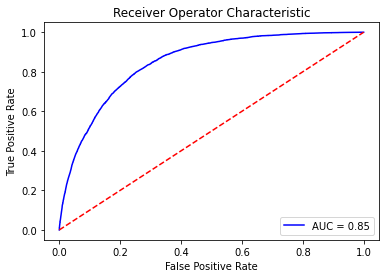

In [52]:
#=================================================-
#### Slide 25: Putting it all together: ROC plot  ####

# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()




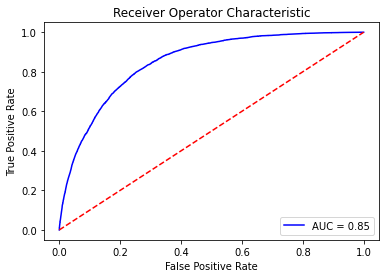

In [53]:
#=================================================-
#### Slide 26: Putting it all together: ROC plot (cont'd)  ####

# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/2 BUILDINGNEURALNETWORKS/INTROTONEURALNETWORKS BUILDINGNEURALNETWORKS 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [ ]:
3-2= 1
1-2= -1

1-1/2= 0

(|1| + |-1|)/2 = 1

(1^2 + -1^2)/2 = 1





1
-1

In [ ]:

model 1:
predict 400k, actually 410k  error 10k
predict 400k, actually 600k  error 200k

absolute error 210 k
absolute mean error 210 k/2= 105 k

10


model 2:
predict 300k, actually 410k  error 110k
predict 490k, actually 600k  error 110k

absolute error 220 k
absolute mean error 220 k/2= 110 k







In [ ]:
1) slides
2) code from yesterday
3) diagram perspective
4) no review

In [60]:
(10000**2 + 200000**2)/2

20050000000.0

In [61]:
(110000**2 + 110000**2)/2

12100000000.0

In [63]:
20,050,000,000.0 > 12,100,000,000.0


True

In [64]:
y_train

34057     0
38232     0
43326     0
62703     0
104659    0
         ..
73349     0
109259    0
50057     0
5192      0
128037    0
Name: HeartDiseaseorAttack, Length: 142145, dtype: int64

In [65]:
np.unique(y_train)

array([0, 1])

In [66]:
#=================================================-
#### Slide 12: Fitting & visualizing training history: accuracy   ####

N_EPOCHS = 25                     #<- number of epochs
N_CLASSES = np.unique(y_train)    #<- number of classes in the target variable 

# Build neural network model by creating a classifier:
# add the number of hidden neurons in the 1st hidden layer and set random state.
mlp = MLPClassifier(hidden_layer_sizes = (64), random_state = 1)          

scores_train = [] #<- store scores for training history here
scores_test = []  #<- store scores for testing history here

epoch = 0 #<- set epoch count
while epoch < N_EPOCHS:
    mlp_fit = mlp.partial_fit(X_train_scaled, y_train, classes=N_CLASSES)
    
    # Compute score for train data.
    scores_train.append(mlp.score(X_train_scaled, y_train))
    
    # Compute score for test data.
    scores_test.append(mlp.score(X_test_scaled, y_test))
    epoch += 1 #<- increment the epoch





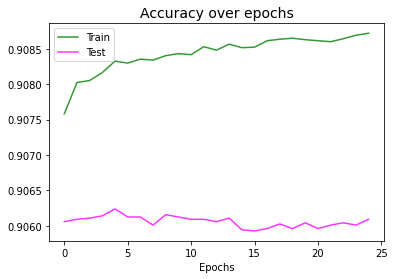

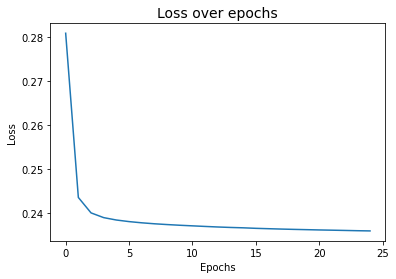

In [67]:
#=================================================-
#### Slide 13: Inspect model accuracy and loss  ####

plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()
plt.plot(mlp.loss_curve_)
plt.title("Loss over epochs", fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()                      




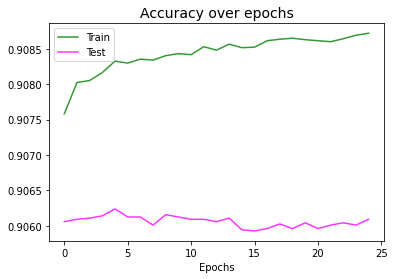

In [68]:
#=================================================-
#### Slide 14: Inspect model accuracy and loss (cont'd)  ####

plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()




In [69]:
#=====================================================================-
#### Slide 17: Class imbalanced dataset challenges  ####

print(heart_disease['HeartDiseaseorAttack'].value_counts())




HeartDiseaseorAttack
0    183853
1     19212
Name: count, dtype: int64


In [70]:
#=================================================-
#### Slide 20: Balancing target with SMOTE (cont'd)  ####

from imblearn.over_sampling import SMOTE

# Initialize SMOTE object.
smote = SMOTE()

# Now, fit the sampling method to the train data and labels.
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)
print(y_train_sm.value_counts())




HeartDiseaseorAttack
0    128787
1    128787
Name: count, dtype: int64


In [ ]:
#=================================================-
#### Slide 23: Exercise  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
